**Autor:** Harvey Rodriguez Gil

<mark>***Problema de Optimización***</mark>

La función de Rosenbrock está definida de la siguiente forma:
$$z = f(x, y) = 100 \cdot (x^2 - y)^2 + (1 - x)^2$$
En la región: 
$$x \in [-2, 2]$$
$$y \in [-1, 1]$$


## Librerías a utilizar

In [60]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm


## Condiciones Iniciales

In [61]:
x_range = (-2, 2)
y_range = (-1, 1)


## Gráfico de la función

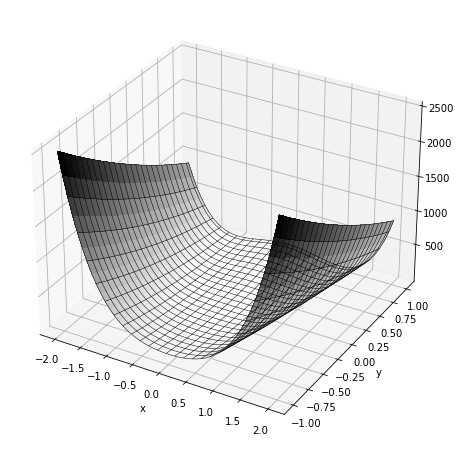

In [62]:
def f(x, y):
    return 100 * (x ** 2 - y) ** 2 + (1 - x) ** 2


X = np.linspace(start=x_range[0], stop=x_range[1], num=50)
Y = np.linspace(start=y_range[0], stop=y_range[1], num=50)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection="3d")
ax.plot_surface(X, Y, Z, cmap=cm.binary, linewidth=0.5, antialiased=False)
ax.plot_wireframe(X, Y, Z, color="black", linewidth=0.5,
                  alpha=1.0, rstride=2, cstride=2)

plt.xlabel("x")
plt.ylabel("y")
plt.show()


## Funciones

In [63]:
def gradiente(x, y):
    """
    Retorna una tupla con las derivadas parciales de
    la funcion de Rosenbrock
    """
    gx = 400 * x * (x ** 2 - y) - 2 * (1 - x)
    gy = -200 * (x ** 2 - y)
    return gx, gy


def mejora(x, y, s, delta):
    """
    Retorna una tupla con los nuevos valores de x, y 
    calculados a partir del gradiente y delta
    """
    if x - delta * s[0] >= -2 and x - delta * s[0] <= 2:
        x = x - delta * s[0]
    elif x - delta * s[0] < -2:
        x = -2
    else:
        x = 2

    if y - delta * s[1] >= -1 and y - delta * s[1] <= 1:
        y = y - delta * s[1]
    elif y - delta * s[1] < -1:
        y = -1
    else:
        y = 1

    return x, y


def minimizacion(x, y, iter, delta):
    """
    Retorna una tupla con los valores obtenidos en 
    cada uno de los saltos buscando llegar al 
    minimo de la funcion.
    """
    solucion_x = []
    solucion_y = []
    solucion_z = []
    solucion_x.append(x)
    solucion_y.append(y)
    solucion_z.append(f(x, y))

    for i in range(iter):
        derivada_it = gradiente(x, y)
        s = derivada_it/np.linalg.norm(derivada_it)
        x, y = mejora(x, y, s, delta)

        solucion_x.append(x)
        solucion_y.append(y)
        solucion_z.append(f(x, y))
    print(
        f'El último valor obtenido de la función f(x,y) es: {sol_z[-1]}\nEn los puntos x: {sol_x[-1]} e y: {sol_y[-1]}\nLa cantidad de iteraciones realizadas ha sido de: {iter}')
    return solucion_x, solucion_y, solucion_z


def semilla():
    """
    Retorna una tupla con la posicion inicial obtenida
    de forma aleatoria. Este valor se encuentra entre 
    el rango de movimiento de x e y
    """
    x_ini = random.uniform(x_range[0], x_range[1])
    y_ini = random.uniform(y_range[0], y_range[1])
    print(f'El valor inicial a evaluar es (x,y) = {x,y}')
    return x_ini, y_ini


def iteraciones():
    """
    Retorna un entero con el número de iteraciones"""
    return random.randint(1000, 5000)


def plot_gradiente(sol_x, sol_y):
    """
    Genera el gráfico de cada uno de los pasos de la 
    funcion de mejora
    """
    X = np.linspace(start=x_range[0], stop=x_range[1], num=50)
    Y = np.linspace(start=y_range[0], stop=y_range[1], num=50)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)

    plt.subplots(figsize=(8, 8))
    plt.gca().contourf(X, Y, Z, cmap=cm.Greys, levels=20, alpha=1.0)
    plt.gca().contour(X, Y, Z, colors="gray", levels=20)
    plt.plot(
        [1], [1], "o", color="black", fillstyle="none", markersize=11, markeredgewidth=2
    )
    plt.plot([1], [1], ".", color="black")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.plot(sol_x, sol_y, "o-", color="k")
    plt.show()


## Visualización de la optimización

El valor inicial a evaluar es (x,y) = ((0.8011161237301891, 0.7102313505192089))
El último valor obtenido de la función f(x,y) es: 0.266350005908583
En los puntos x: 0.7702492565799822 e y: 0.6394969675623938
La cantidad de iteraciones realizadas ha sido de: 4734


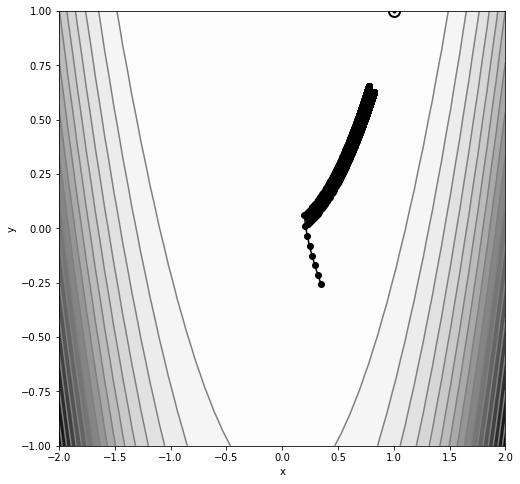

In [64]:
x_ini, y_ini = semilla()
iter = iteraciones()
sol_x, sol_y, sol_z = minimizacion(x_ini, y_ini, iter, 0.05)
plot_gradiente(sol_x, sol_y)
